In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Add slmsuite to the python path.
import sys, os
sys.path.append(os.path.join(os.getcwd(), '../../slmsuite'))

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from mpl_toolkits.axes_grid1 import make_axes_locatable

mpl.rc('image', cmap='Blues')

### A simulated SLM

In [2]:
from slmsuite.hardware.slms.simulated import SimulatedSLM

# res = (1920,1200)
# slm = SimulatedSLM(res, phase_offset=np.zeros((res[1],res[0])), bitdepth=12)

res = (32,64)
slm = SimulatedSLM(res, bitdepth=12)

santec.py: Santec DLLs not installed. Install these to use Santec SLMs.
  Dynamically linked libraries from Santec (usually provided via USB) must be present in the slms directory:
  - SLMFunc.dll
  - FTD3XX.dll
  You can find the slms directory at 'C:\Users\cpanu\Documents\GitHub\slmsuite\slmsuite\hardware\slms'
  Check that theses files are present and are error-free.
Original error: Could not find module 'SLMFunc.dll' (or one of its dependencies). Try using the full path with constructor syntax.
screenmirrored.py: pyglet not installed. Install to use ScreenMirrored SLMs.


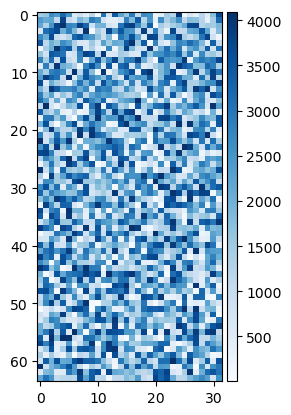

In [3]:
fig, ax = plt.subplots(1,1)
im = ax.imshow(slm.display)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

### A simulated camera - computes the FF of simulated SLM; resamples to cam resolution w/i box given by an affine transformation

In [4]:
from slmsuite.hardware.cameras.simulated import SimulatedCam

cam = SimulatedCam((1000,1000), bitdepth=12)

alliedvision.py: vimba not installed. Install to use AlliedVision cameras.
filr.py: PySpin not installed. Install to use FLIR cameras.
mmcore.py: pymmcore not installed. Install to use Micro-Manager cameras.
thorlabs.py: thorlabs_tsi_sdk DLL not found. Resolve to use Thorlabs cameras.
thorlabs.py: thorlabs_tsi_sdk not installed. Install to use Thorlabs cameras.


In [13]:
%%prun #few ms to take an image -> limited by swaps back and forth to GPU
img = cam.get_image(slm, plot=False)